## Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [13]:
dataset=pd.read_csv('train.csv')
print("Test data is uploaded")

Test data is uploaded


In [14]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.5,0.418208,0.366344,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,0.636364,1.0,1.0,0.666667,0.500,0.036765,0.098361,1.0,0.0,1.0,1.0,0.666667,0.12250,0.8,0.75,0.50,0.8,0.75,0.25,1.000000,0.125089,0.2,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.0,0.75,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.666667,0.75
1,2,12.109011,0.000000,0.5,0.495064,0.391317,1.0,0.0,1.000000,1.0,1.0,0.25,1.0,0.500000,1.0,0.6,0.555556,0.875,0.227941,0.524590,1.0,0.0,0.4,0.3,0.000000,0.00000,0.6,0.75,0.75,0.8,0.75,1.00,0.833333,0.173281,0.2,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.75,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,0.666667,0.75
2,3,12.317167,0.235294,0.5,0.434909,0.422359,1.0,0.0,0.666667,1.0,1.0,1.00,1.0,0.636364,1.0,1.0,0.666667,0.500,0.051471,0.114754,1.0,0.0,1.0,1.0,0.666667,0.10125,0.8,0.75,0.50,0.8,0.75,0.50,1.000000,0.086109,0.2,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.75,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.666667,0.75
3,4,11.849398,0.294118,0.5,0.388581,0.390295,1.0,0.0,0.666667,1.0,1.0,0.75,1.0,0.727273,1.0,1.0,0.666667,0.500,0.669118,0.606557,1.0,0.0,0.2,0.4,0.000000,0.00000,0.6,0.75,1.00,0.6,1.00,0.25,0.833333,0.038271,0.2,0.0,0.231164,0.123732,1.0,0.8,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.25,0.074766,0.333333,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,0.666667,0.00
4,5,12.429216,0.235294,0.5,0.513123,0.468761,1.0,0.0,0.666667,1.0,1.0,0.25,1.0,1.000000,1.0,1.0,0.777778,0.500,0.058824,0.147541,1.0,0.0,1.0,1.0,0.666667,0.21875,0.8,0.75,0.50,0.8,0.75,0.75,1.000000,0.116052,0.2,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.75,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.666667,0.75


In [15]:
## Capture the dependent feature
Sale_Price=dataset[['SalePrice']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,dataset['SalePrice'],test_size=0.2)

In [17]:
## drop dependent feature from dataset
X_train=X_train.drop(['Id','SalePrice'],axis=1)
X_test=X_test.drop(['Id','SalePrice'],axis=1)

In [18]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
585,0.000000,0.50,0.530342,0.425688,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,0.863636,1.0,0.6,0.777778,0.500,0.007353,0.016393,0.5,0.0,1.0,1.0,0.666667,0.130000,0.8,0.75,0.50,1.0,0.75,1.00,1.000000,0.258682,0.2,0.0,0.174658,0.305728,1.0,1.0,1.0,1.0,0.682567,0.000000,0.0,0.638047,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.416667,1.0,0.666667,0.8,0.75,0.009346,0.666667,0.75,0.620592,1.0,1.0,1.0,0.380397,0.120658,0.0,0.0,0.0,0.0,0.000000,0.0,0.181818,0.00,1.000000,1.00
1356,0.000000,0.50,0.440313,0.388793,1.0,0.0,1.000000,1.0,1.0,0.75,1.0,0.363636,1.0,0.6,0.444444,0.500,0.308824,0.704918,1.0,0.0,0.6,0.5,0.666667,0.040625,0.6,0.75,0.75,0.6,0.75,0.25,0.500000,0.060241,0.2,0.0,0.224315,0.141408,1.0,0.6,1.0,1.0,0.371745,0.000000,0.0,0.347498,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.75,0.392523,0.666667,0.25,0.186178,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.818182,0.50,0.666667,0.75
865,0.000000,0.50,0.440313,0.373172,1.0,0.0,0.666667,1.0,1.0,1.00,1.0,0.363636,1.0,0.6,0.444444,0.625,0.286765,0.655738,1.0,0.0,0.4,0.3,0.666667,0.047500,0.6,0.75,0.75,0.6,0.75,0.25,0.666667,0.146704,0.2,0.0,0.074486,0.163993,1.0,0.6,1.0,1.0,0.415752,0.000000,0.0,0.388634,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.336449,0.333333,0.50,0.636107,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.636364,0.75,0.666667,0.75
917,0.000000,0.50,0.440313,0.504765,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,0.227273,1.0,0.6,0.333333,0.625,0.389706,0.885246,1.0,0.0,1.0,1.0,0.000000,0.000000,0.6,0.75,0.75,0.6,0.75,0.25,0.833333,0.187633,0.2,0.0,0.032106,0.185597,1.0,1.0,1.0,0.5,0.493029,0.000000,0.0,0.460871,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.0,0.75,0.495327,0.666667,0.25,0.200282,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.272727,0.75,0.666667,0.75
387,0.352941,0.50,0.456066,0.335012,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,0.227273,1.0,0.4,0.555556,0.625,0.242647,0.557377,0.5,0.0,0.4,0.3,0.666667,0.159375,0.6,0.75,0.75,0.6,0.75,0.75,0.833333,0.111800,0.2,0.0,0.175514,0.170376,1.0,1.0,1.0,1.0,0.459568,0.000000,0.0,0.429593,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.4,0.25,0.299065,0.333333,0.25,0.248237,1.0,1.0,1.0,0.345391,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.818182,0.75,0.666667,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.235294,0.25,0.577658,0.443792,1.0,0.0,1.000000,1.0,1.0,0.75,1.0,0.818182,1.0,1.0,0.666667,0.500,0.044118,0.098361,1.0,0.0,1.0,1.0,0.000000,0.000000,0.8,0.75,0.50,0.8,0.75,0.25,1.000000,0.039334,0.2,0.0,0.329195,0.162193,1.0,1.0,1.0,1.0,0.411574,0.462954,0.0,0.623628,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.8,0.75,0.056075,0.666667,0.50,0.478138,1.0,1.0,1.0,0.000000,0.248629,0.0,0.0,0.0,0.0,0.333333,0.0,0.363636,1.00,0.666667,0.75
604,0.000000,0.50,0.530342,0.447667,1.0,0.0,0.666667,1.

In [19]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [20]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [23]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 75
selected features: 16


In [24]:
selected_feat

Index(['Neighborhood', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'BsmtExposure', 'BsmtFinType1', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'SaleCondition'],
      dtype='object')

In [25]:
X_train=X_train[selected_feat]

In [27]:
X_test = X_test[selected_feat]

In [26]:
X_train.head()

,Neighborhood,BldgType,OverallQual,YearRemodAdd,BsmtExposure,BsmtFinType1,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
585,0.863636,1.0,0.777778,0.016393,1.00,1.000000,1.0,0.682567,0.638047,0.666667,0.666667,0.8,0.75,0.666667,0.75,1.00
1356,0.363636,1.0,0.444444,0.704918,0.25,0.500000,1.0,0.371745,0.347498,0.333333,0.333333,0.0,0.75,0.666667,0.25,0.75
865,0.363636,1.0,0.444444,0.655738,0.25,0.666667,1.0,0.415752,0.388634,0.333333,0.333333,0.0,0.25,0.333333,0.50,0.75
917,0.227273,1.0,0.333333,0.885246,0.25,0.833333,1.0,0.493029,0.460871,0.333333,0.333333,0.0,0.75,0.666667,0.25,0.75
387,0.227273,1.0,0.555556,0.557377,0.75,0.833333,1.0,0.459568,0.429593,0.333333,0.333333,0.4,0.25,0.333333,0.25,0.00


# Train the Model 
Using Linear Regression concept

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Randomized Search CV

n_estimators = [True,False]
normalize = [True,False]

In [66]:

# Create the random grid
random_grid = {'fit_intercept': n_estimators,
               'normalize': normalize,
               }

print(random_grid)

{'fit_intercept': [True, False], 'normalize': [True, False]}


In [67]:
# search across 100 different combinations
model_cv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_jobs = 1)

In [68]:
model_cv.fit(X_train,y_train)

F:\Anaconda-Python\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=LinearRegression(), n_jobs=1,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False]})

In [69]:
model_cv.score(X_train,y_train)

0.8839656118961655

Model got 88% score on train data, which is good because we need to consider we had drop many columns

# Predicting the model accuracy

In [76]:
predictions=model_cv.predict(X_test)

In [77]:
model_cv.score(X_test,y_test)

0.8899286899543434

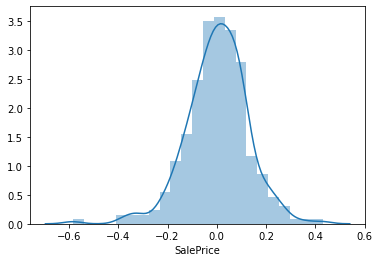

In [79]:
import seaborn as sns
sns.distplot(y_test-predictions)

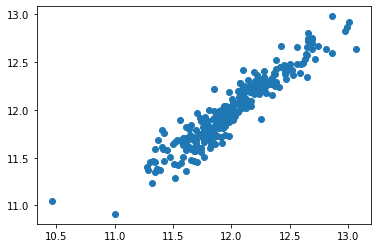

In [80]:
plt.scatter(y_test,predictions)

### Conclusion 
From the above two graph i.e. one of them is look like perfect normal distribution and other is monotonic increasing. Accuracy score is 88% on test data, which is pretty good.
So overall Linear regression performed well on this model 

## Save data into pickle file

In [82]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_cv, file)